In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import os
os.chdir('..')

In [2]:
estimatedMI_central = pd.read_csv('data/output/mutual_info/estimated_mutual_info_all_epitopes.csv')
estimatedMI_end = pd.read_csv('data/output/mutual_info/estimated_mutual_info_all_epitopes_endpadding.csv')

In [3]:
estimatedMI_central.columns = ['name', 'real', 'shuffle']

estimatedMI_central[['epitope', 'vars']] = estimatedMI_central['name'].str.split('_', 1, expand=True)
estimatedMI_central[['var1','var2']] = estimatedMI_central['vars'].str.split('-', 1, expand=True)
estimatedMI_central = estimatedMI_central.drop(['name','vars'], axis=1)
estimatedMI_central['real_MI'] = estimatedMI_central['real'] - estimatedMI_central['shuffle']
estimatedMI_central['var1'] = estimatedMI_central['var1'].replace('cdr3a','CDR3a')
estimatedMI_central['var2'] = estimatedMI_central['var2'].replace('cdr3a','CDR3a')
estimatedMI_central['var1'] = estimatedMI_central['var1'].replace('cdr3b','CDR3b')
estimatedMI_central['var2'] = estimatedMI_central['var2'].replace('cdr3b','CDR3b')
print(estimatedMI_central)

          real    shuffle     epitope   var1   var2   real_MI
0    15.874756   7.251155   ASNENMETM     Ja  CDR3a  8.623601
1     8.277162   5.880050   ASNENMETM     Ja  CDR3b  2.397112
2     0.816246   0.603484   ASNENMETM     Ja     Jb  0.212762
3     3.891015   2.705514   ASNENMETM     Jb  CDR3a  1.185500
4     9.995252   2.261418   ASNENMETM     Jb  CDR3b  7.733834
..         ...        ...         ...    ...    ...       ...
355   5.359227   4.437795  background     Vb  CDR3a  0.921433
356   7.316673   4.229559  background     Vb  CDR3b  3.087115
357   1.086636   0.884852  background     Vb     Ja  0.201785
358   0.475710   0.346679  background     Vb     Jb  0.129030
359  22.666520  19.730775  background  CDR3a  CDR3b  2.935746

[360 rows x 6 columns]


/tmp/ipykernel_411849/447558215.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  estimatedMI_central[['epitope', 'vars']] = estimatedMI_central['name'].str.split('_', 1, expand=True)
/tmp/ipykernel_411849/447558215.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  estimatedMI_central[['var1','var2']] = estimatedMI_central['vars'].str.split('-', 1, expand=True)


In [4]:
estimatedMI_end.columns = ['name', 'real', 'shuffle']

estimatedMI_end[['epitope', 'vars']] = estimatedMI_end['name'].str.split('_', 1, expand=True)
estimatedMI_end[['var1','var2']] = estimatedMI_end['vars'].str.split('-', 1, expand=True)
estimatedMI_end = estimatedMI_end.drop(['name','vars'], axis=1)
estimatedMI_end['real_MI'] = estimatedMI_end['real'] - estimatedMI_end['shuffle']
estimatedMI_end['var1'] = estimatedMI_end['var1'].replace('cdr3a','CDR3a')
estimatedMI_end['var2'] = estimatedMI_end['var2'].replace('cdr3a','CDR3a')
estimatedMI_end['var1'] = estimatedMI_end['var1'].replace('cdr3b','CDR3b')
estimatedMI_end['var2'] = estimatedMI_end['var2'].replace('cdr3b','CDR3b')
print(estimatedMI_end)

          real    shuffle     epitope   var1   var2   real_MI
0    16.271635   9.892843   ASNENMETM     Ja  CDR3a  6.378792
1    10.984883   7.739736   ASNENMETM     Ja  CDR3b  3.245146
2     0.865602   0.597291   ASNENMETM     Ja     Jb  0.268310
3     5.161829   3.564034   ASNENMETM     Jb  CDR3a  1.597795
4     9.586846   2.872753   ASNENMETM     Jb  CDR3b  6.714093
..         ...        ...         ...    ...    ...       ...
370   7.012601   6.080408  background     Vb  CDR3a  0.932194
371   9.142024   5.528781  background     Vb  CDR3b  3.613243
372   1.175285   0.973062  background     Vb     Ja  0.202222
373   0.506836   0.381518  background     Vb     Jb  0.125319
374  35.008988  31.099485  background  CDR3a  CDR3b  3.909503

[375 rows x 6 columns]


/tmp/ipykernel_411849/887623165.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  estimatedMI_end[['epitope', 'vars']] = estimatedMI_end['name'].str.split('_', 1, expand=True)
/tmp/ipykernel_411849/887623165.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  estimatedMI_end[['var1','var2']] = estimatedMI_end['vars'].str.split('-', 1, expand=True)


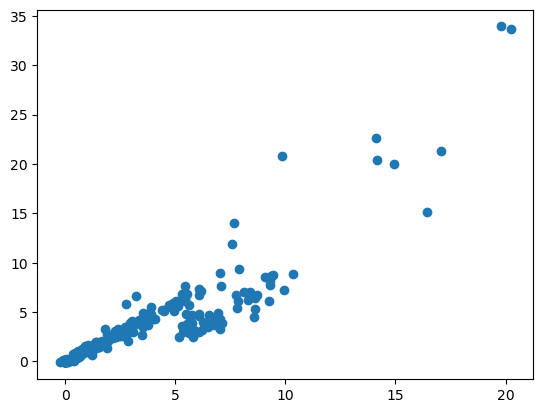

In [5]:
X = pd.merge(estimatedMI_central[['epitope','var1', 'var2', 'real_MI']], 
             estimatedMI_end[['epitope','var1', 'var2', 'real_MI']],
             on = ['epitope','var1', 'var2'])
plt.scatter(X['real_MI_x'], X['real_MI_y'])

9 [('Ja', 'CDR3a'), ('Ja', 'CDR3b'), ('Jb', 'CDR3a'), ('Jb', 'CDR3b'), ('Va', 'CDR3a'), ('Va', 'CDR3b'), ('Vb', 'CDR3a'), ('Vb', 'CDR3b'), ('CDR3a', 'CDR3b')]
Ja CDR3a
Ja CDR3b
Jb CDR3a
Jb CDR3b
Va CDR3a
Va CDR3b
Vb CDR3a
Vb CDR3b
CDR3a CDR3b


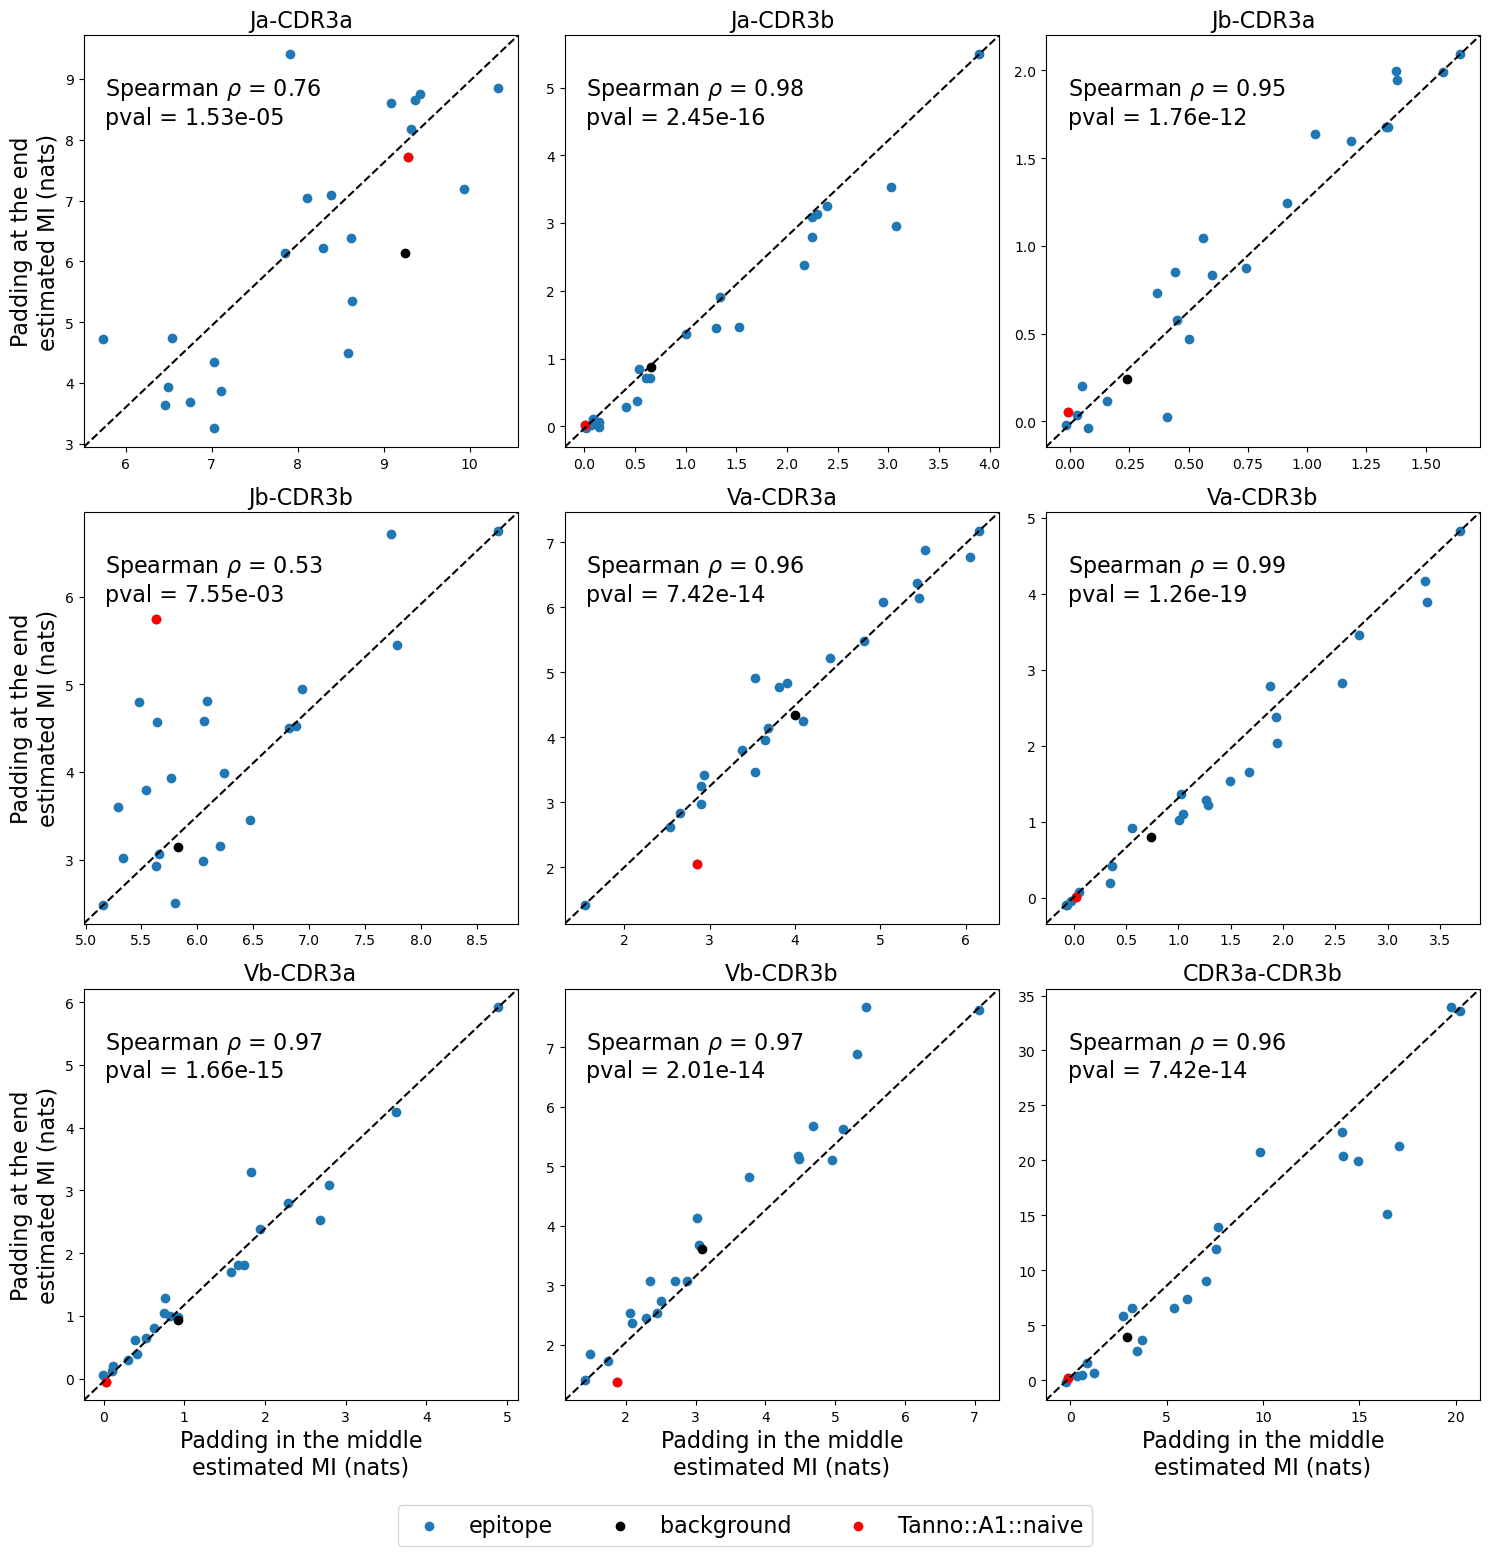

In [6]:
unique_pairs = X[['var1', 'var2']].drop_duplicates()
unique_pairs_cdr3 = unique_pairs.loc[unique_pairs['var1'].str.contains('CDR3') | unique_pairs['var2'].str.contains('CDR3')]
pairs = [(x, y) for x, y in zip(unique_pairs_cdr3['var1'], unique_pairs_cdr3['var2'])]
print(len(pairs), pairs)

f, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (15, 15))
ax = axs.ravel()

for i, (v1, v2) in enumerate(pairs):
    print(v1, v2)
    ss = X.loc[(X['var1'] == v1) & (X['var2'] == v2)]
    x = ss['real_MI_x']
    y = ss['real_MI_y']
    R, p = spearmanr(x,y)
    # print(v1, v2, )
    ax[i].scatter(ss.loc[ss['epitope'] != 'background']['real_MI_x'], 
                  ss.loc[ss['epitope'] != 'background']['real_MI_y'], label = 'epitope')
    ax[i].scatter(ss.loc[ss['epitope'] == 'background']['real_MI_x'], 
                  ss.loc[ss['epitope'] == 'background']['real_MI_y'], 
                  c = 'k', label = 'background')
    ax[i].scatter(ss.loc[ss['epitope'] == 'Tanno::A1::naive']['real_MI_x'], 
                  ss.loc[ss['epitope'] == 'Tanno::A1::naive']['real_MI_y'], 
                  c = 'r', label = 'Tanno::A1::naive')
    ax[i].text(0.05, 0.9, r'Spearman $\rho$ = ' + str(round(R,2)) + '\npval = ' + '{:.2e}'.format(p), 
               transform=ax[i].transAxes,fontsize = 16, verticalalignment='top')
    ax[i].plot([0, 1], [0, 1], transform=ax[i].transAxes, ls = '--', c = 'k')
    ax[i].set_title(v1 + '-' + v2, fontsize = 16)

    if i in [0,3,6]:
        ax[i].set_ylabel('Padding at the end\nestimated MI (nats)', fontsize = 16)
    if i > 5:
        ax[i].set_xlabel('Padding in the middle\nestimated MI (nats)', fontsize = 16)

handles, l = ax[i].get_legend_handles_labels()
lgd = f.legend(handles, l, bbox_to_anchor = [0.5,0], loc='upper center', ncols = 3, fontsize = 16)
plt.tight_layout()
plt.savefig('figures/MI_padding_comparison.png',
            bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [7]:
estimatedMI_central['epitope'].unique()

array(['ASNENMETM', 'ATDALMTGF', 'AVFDRKSDAK', 'CINGVCWTV', 'ELAGIGILTV',
       'GILGFVFTL', 'GLCTLVAML', 'HGIRNASFI', 'IVTDFSVIK', 'KSKRTPMGF',
       'LLWNGPMAV', 'LSLRNPILV', 'LTDEMIAQY', 'NLVPMVATV', 'RAKFKQLL',
       'RLRAEAQVK', 'SPRWYFYYL', 'SSLENFRAYV', 'SSPPMFRV', 'SSYRRPVGI',
       'TTDPSFLGRY', 'Tanno::A1::naive', 'YLQPRTFLL', 'background'],
      dtype=object)